[Midterm Project](https://colab.research.google.com/github/Jaguar838/ml-zoomcamp/blob/master/HW/midterm_project.ipynb)

## [Dataset](https://www.kaggle.com/datasets/robinamirbahar/eartquakes-1990-2023/data)

The earthquakes dataset records global earthquake events from 1990 to 2023, with around three million entries. Each record includes details like date, time, location (latitude, longitude), magnitude, depth, magnitude type, affected region, and other key attributes.

In [28]:
# Load the dataset
data_path='https://www.kaggle.com/api/v1/datasets/download/robinamirbahar/eartquakes-1990-2023'
!wget -nv -O archive.zip $data_path 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('archive.zip')

In [2]:
df.columns

Index(['time', 'place', 'status', 'tsunami', 'significance', 'data_type',
       'magnitudo', 'state', 'longitude', 'latitude', 'depth', 'date'],
      dtype='object')

In [ ]:
df.tail()

In [ ]:
df.date = pd.to_datetime(df.date, format='mixed')
df = df.set_index("date")

In [ ]:
df["magnitudo"].plot(kind = "line", style = ".", title ="Magnitudo trend by year", figsize =(16,5))
plt.show()

In [20]:
df.shape

(3428882, 13)

In [8]:
# Extract the year into a new column
df['year'] = df.date.dt.year
# Strip left and right spaces from the state column
df['state'] = df['state'].str.strip()

In [9]:
unique_values = df.nunique()
typpe_values = df.dtypes

summary_df = pd.DataFrame(
    {'Unique Values': unique_values,
     'Data Type': typpe_values})
summary_df

,Unique Values,Data Type
time,3428775,int64
place,531130,object
status,6,object
tsunami,2,int64
significance,1170,int64
data_type,25,object
magnitudo,933,float64
state,765,object
longitude,733599,float64
latitude,518295,float64


In [10]:
df.describe(include='object').T

,count,unique,top,freq
place,3445751,531130,"6 km W of Cobb, California",24202
status,3445751,6,reviewed,3224825
data_type,3445751,25,earthquake,3361846
state,3445751,765,California,1358364


In [16]:
df[['significance', 'magnitudo', 'depth']].describe().T

,count,mean,std,min,25%,50%,75%,max
significance,3445751.0,74.009735,101.636415,0.00,13.00,33.00,81.00,2910.0
magnitudo,3445751.0,1.774076,1.291055,-9.99,0.91,1.46,2.30,9.1
depth,3445751.0,22.853874,54.849379,-10.00,3.12,7.70,16.12,735.8


In [6]:
df.isna().sum()

time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64

In [9]:
data_type = df['data_type'].value_counts()
data_type

data_type
earthquake                    3361846
quarry blast                    38865
explosion                       26571
ice quake                       13838
mining explosion                 2177
other event                      1706
chemical explosion                314
rock burst                        182
sonic boom                        104
nuclear explosion                  56
mine collapse                      20
volcanic eruption                  17
quarry                             15
not reported                       12
experimental explosion              9
landslide                           8
acoustic noise                      2
rockslide                           2
Ice Quake                           1
induced or triggered event          1
accidental explosion                1
meteorite                           1
collapse                            1
Rock Slide                          1
snow avalanche                      1
Name: count, dtype: int64

In [36]:
def transform_data_type(df, column_name='data_type', top_n=5, other_category='other event'):
    """
    Преобразует значения в указанной колонке, объединяя все категории, кроме топ-N, в 'other event'.

    :param df: pd.DataFrame - исходный DataFrame
    :param column_name: str - имя колонки для преобразования
    :param top_n: int - количество наиболее частых категорий для сохранения
    :param other_category: str - имя категории для остальных значений
    :return: pd.DataFrame - новый DataFrame с преобразованной колонкой
    """
    # Создаем копию DataFrame
    df_copy = df.copy()

    # Считаем наиболее частые категории
    data_type_counts = df_copy[column_name].value_counts()
    top_categories = data_type_counts.index[:top_n]

    # Преобразуем значения в копии DataFrame
    df_copy[column_name] = df_copy[column_name].apply(
        lambda x: x if x in top_categories else other_category
    )

    return df_copy


In [3]:
status = df['status'].value_counts()
status

status
Reviewed     3238918
Automatic     206821
Manual            12
Name: count, dtype: int64

In [37]:
# Преобразуем значения
df_transformed = transform_data_type(df_earthquake, column_name='data_type', top_n=5)
print(df_transformed)

                                           time  \
date                                              
1990-01-01 00:22:33.990000+00:00   631153353990   
1990-01-01 00:24:51.210000+00:00   631153491210   
1990-01-01 00:34:43.450000+00:00   631154083450   
1990-01-01 00:58:32.130000+00:00   631155512130   
1990-01-01 01:03:44.490000+00:00   631155824490   
...                                         ...   
2023-07-29 10:34:11.941000+00:00  1690626851941   
2023-07-29 10:36:15.715000+00:00  1690626975715   
2023-07-29 10:40:15.940000+00:00  1690627215940   
2023-07-29 10:55:46.040000+00:00  1690628146040   
2023-07-29 11:08:57.884000+00:00  1690628937884   

                                                                     place  \
date                                                                         
1990-01-01 00:22:33.990000+00:00         12 km NNW of Meadow Lakes, Alaska   
1990-01-01 00:24:51.210000+00:00                14 km S of Volcano, Hawaii   
1990-01-01 00:34:43.4500

In [22]:
df_not_california = df[~df['state'].str.contains('California', case=False, na=False)]

In [39]:
df_earthquake.shape[0]

1936067

In [21]:
item0 = df.shape[0]
df = df.drop_duplicates()
item1 = df.shape[0]
print(f"There are {item0-item1} duplicates found in the dataset")

There are 0 duplicates found in the dataset


In [38]:
df_earthquake = df_not_california[df_not_california['magnitudo']>=0]

In [ ]:
# df_earthquake = df_not_california[(df_not_california['data_type'] == 'earthquake')&(df_not_california['magnitudo']>=0)]

In [27]:
df_earthquake.reset_index(drop=True, inplace=True)

In [29]:
df_earthquake.to_csv('world_earthquakes.csv', index=False)

print("Данные для World  сохранены в файл 'world_earthquakes.csv'.")

Данные для World  сохранены в файл 'world_earthquakes.csv'.


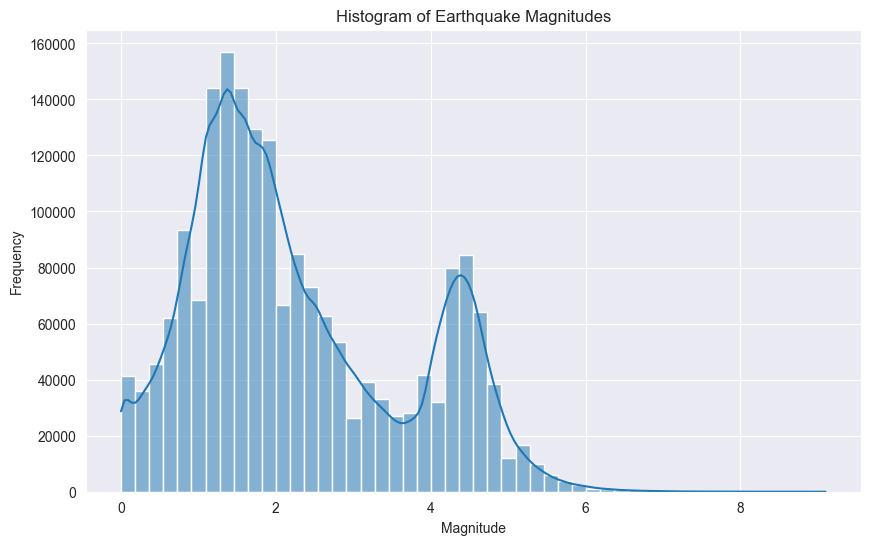

In [28]:
# 1. Histogram of Earthquake Magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(df_earthquake['magnitudo'], bins=50, kde=True)
plt.title('Histogram of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

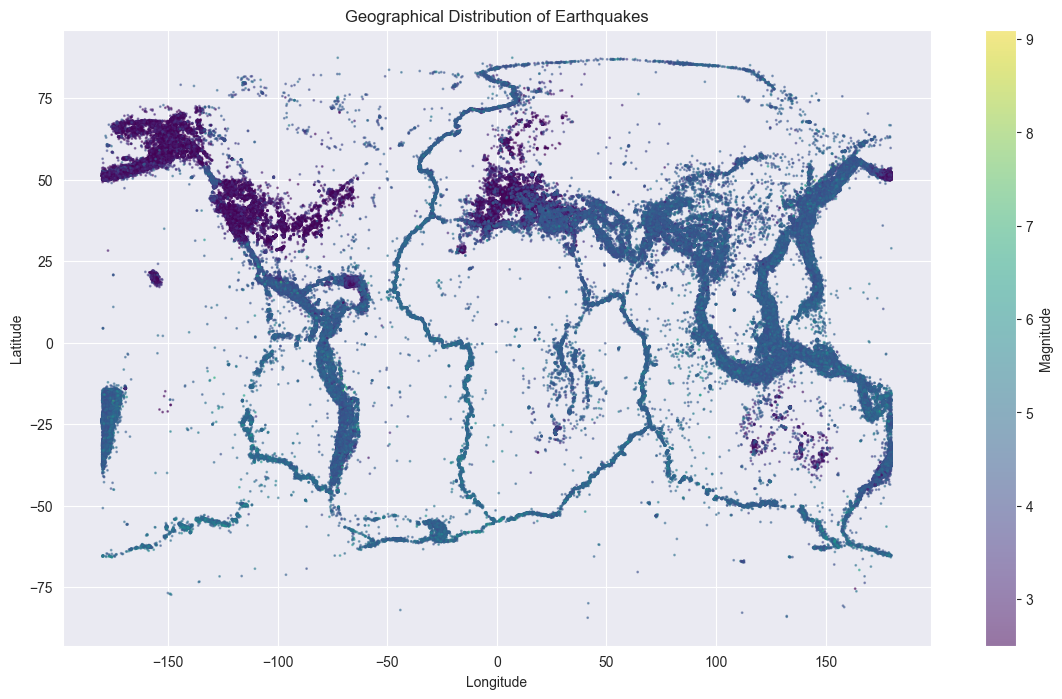

In [14]:
# 2. Geographical Distribution of Earthquakes
plt.figure(figsize=(14, 8))
plt.scatter(df_earthquake['longitude'], df_earthquake['latitude'], alpha=0.5, c=df_earthquake['magnitudo'], cmap='viridis', s=1)
plt.colorbar(label='Magnitude')
plt.title('Geographical Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [12]:
df_filtered = df_earthquake[df_earthquake['status'] != 'automatic']

In [14]:
df_filtered.tail()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
3155241,1690614804520,"4 km WSW of Fuig, Puerto Rico",reviewed,0,93,earthquake,2.46,Puerto Rico,-66.953667,17.965500,6.210000,2023-07-29 07:13:24.520000+00:00
3155242,1690615064246,"19 km NNW of Snyder, Texas",reviewed,0,148,earthquake,3.10,Texas,-100.963820,32.888489,5.208862,2023-07-29 07:17:44.246000+00:00
3155243,1690617754700,"5 km WSW of Liborio Negron Torres, Puerto Rico",reviewed,0,89,earthquake,2.40,Puerto Rico,-66.988333,18.023833,12.710000,2023-07-29 08:02:34.700000+00:00
3155244,1690618014899,"49 km SW of Unalaska, Alaska",reviewed,0,286,earthquake,4.30,Alaska,-167.084000,53.575100,12.202000,2023-07-29 08:06:54.899000+00:00
3155245,1690626851941,"5 km NW of Chikusei, Japan",reviewed,0,326,earthquake,4.60,Japan,139.940200,36.350700,83.039000,2023-07-29 10:34:11.941000+00:00


In [15]:
# Фильтрация строк, где в столбце 'state' содержится слово "California"
df_california = df_filtered[df_filtered['state'].str.contains('California', case=False, na=False)]

In [17]:
df_california.reset_index(drop=True, inplace=True)
df_california.tail()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
1187737,1690585085470,"9 km NNE of Cambria, CA",reviewed,0,32,earthquake,1.44,California,-121.059167,35.644833,6.14,2023-07-28 22:58:05.470000+00:00
1187738,1690586998650,"8 km SE of Sunol, CA",reviewed,0,28,earthquake,1.36,California,-121.841000,37.544833,5.97,2023-07-28 23:29:58.650000+00:00
1187739,1690590180700,"4 km NNW of Pinnacles, CA",reviewed,0,16,earthquake,1.03,California,-121.153000,36.570833,10.06,2023-07-29 00:23:00.700000+00:00
1187740,1690594441010,"4 km W of Walker, CA",reviewed,0,151,earthquake,3.13,California,-119.520333,38.515833,4.78,2023-07-29 01:34:01.010000+00:00
1187741,1690603770290,"4 km WSW of Mammoth Lakes, CA",reviewed,0,0,earthquake,0.03,California,-119.022667,37.622333,2.13,2023-07-29 04:09:30.290000+00:00


In [18]:
df_california['tsunami'].value_counts()

tsunami
0    1187598
1        144
Name: count, dtype: int64

In [20]:
# Оставляем только релевантные столбцы для исследования
relevant_columns = ['time', 'magnitudo', 'depth', 'latitude', 'longitude', 'significance', 'tsunami']
df_california_filtered = df_california[relevant_columns]

# Сохраняем отфильтрованный DataFrame в CSV файл
df_california_filtered.to_csv('california_earthquakes.csv', index=False)

print("Данные для штата California сохранены в файл 'california_earthquakes.csv'.")

Данные для штата California сохранены в файл 'california_earthquakes.csv'.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('california_earthquakes.csv')

In [3]:
item0 = data.shape[0]
data = data.drop_duplicates()
item1 = data.shape[0]
print(f"There are {item0-item1} duplicates found in the dataset")

There are 5726 duplicates found in the dataset


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import joblib

In [4]:
# Exploratory Data Analysis (EDA)
print(data.head())
print(data.info())
print(data.describe())

           time  magnitudo   depth   latitude   longitude  significance  \
0  631154083450       1.11   3.220  38.821000 -122.806167            19   
1  631155512130       0.98  -0.584  37.664333 -118.846333            15   
2  631155824490       2.95  16.122  34.546000 -118.934000           134   
3  631155853760       2.77  16.342  34.543000 -118.923000           118   
4  631156030570       1.13  -1.499  37.632667 -119.040000            20   

   tsunami  
0        0  
1        0  
2        0  
3        0  
4        0  
<class 'pandas.core.frame.DataFrame'>
Index: 1182016 entries, 0 to 1187741
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   time          1182016 non-null  int64  
 1   magnitudo     1182016 non-null  float64
 2   depth         1182016 non-null  float64
 3   latitude      1182016 non-null  float64
 4   longitude     1182016 non-null  float64
 5   significance  1182016 non-null  int64  
 6  

In [5]:
# Preprocess the data
# Create a target variable 'seismicity' based on magnitudo (magnitude)
# Define the bins and labels for the classification
bins = [0, 2.5, 5.5, 9.1]
labels = ['low', 'medium', 'high']
data['seismicity'] = pd.cut(data['magnitudo'], bins=bins, labels=labels)



In [6]:
# Drop rows with missing values
data = data.dropna()


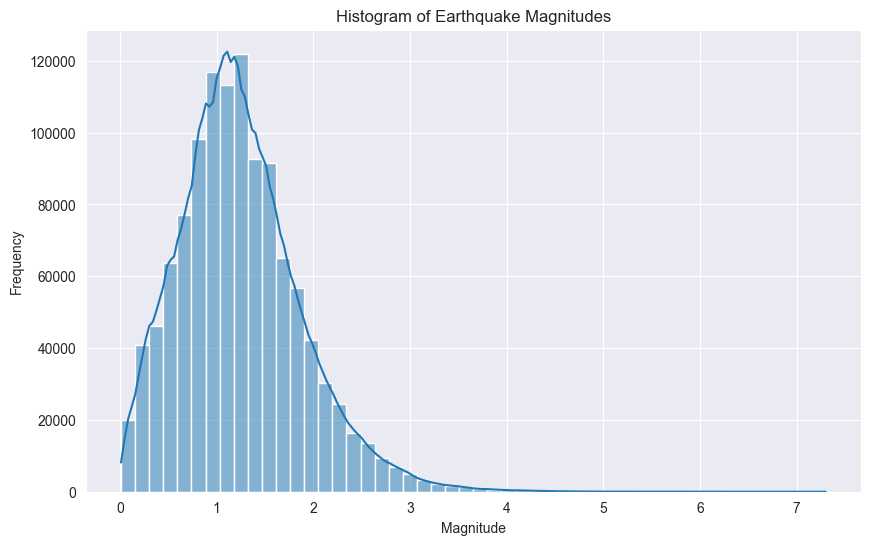

In [7]:
# 1. Histogram of Earthquake Magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(data['magnitudo'], bins=50, kde=True)
plt.title('Histogram of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()


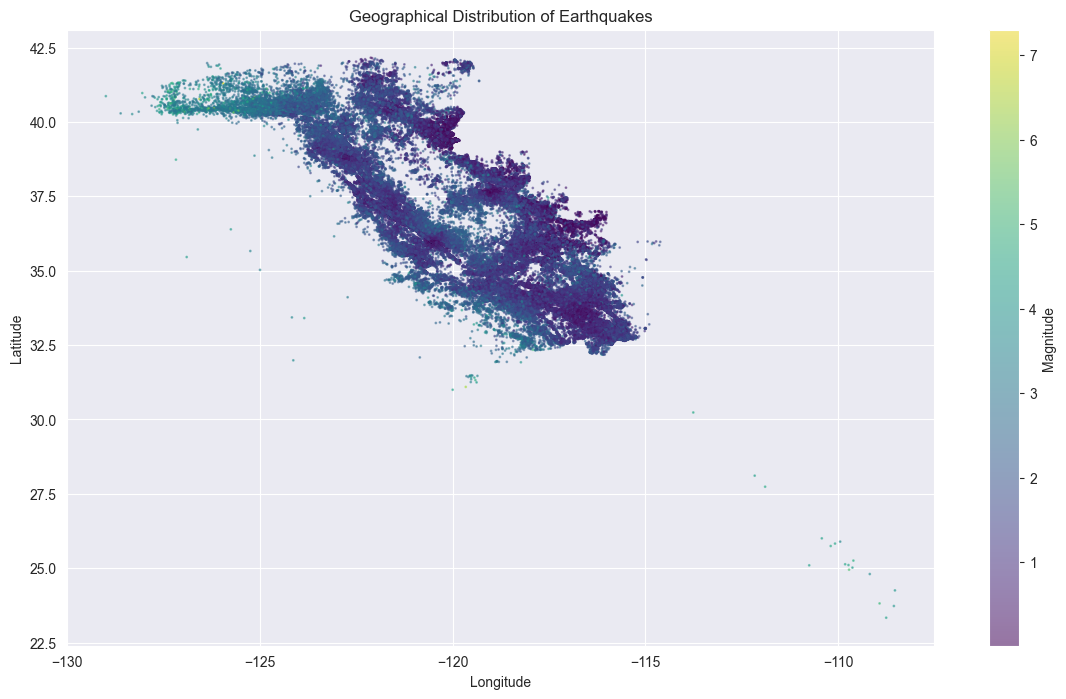

In [8]:
# 2. Geographical Distribution of Earthquakes
plt.figure(figsize=(14, 8))
plt.scatter(data['longitude'], data['latitude'], alpha=0.5, c=data['magnitudo'], cmap='viridis', s=1)
plt.colorbar(label='Magnitude')
plt.title('Geographical Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

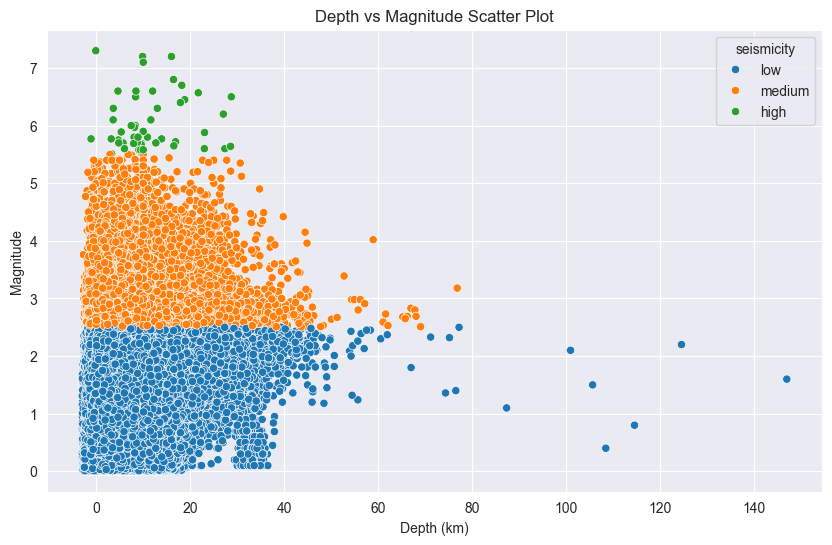

In [9]:
# 3. Depth vs Magnitude Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='magnitudo', data=data, hue='seismicity')
plt.title('Depth vs Magnitude Scatter Plot')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

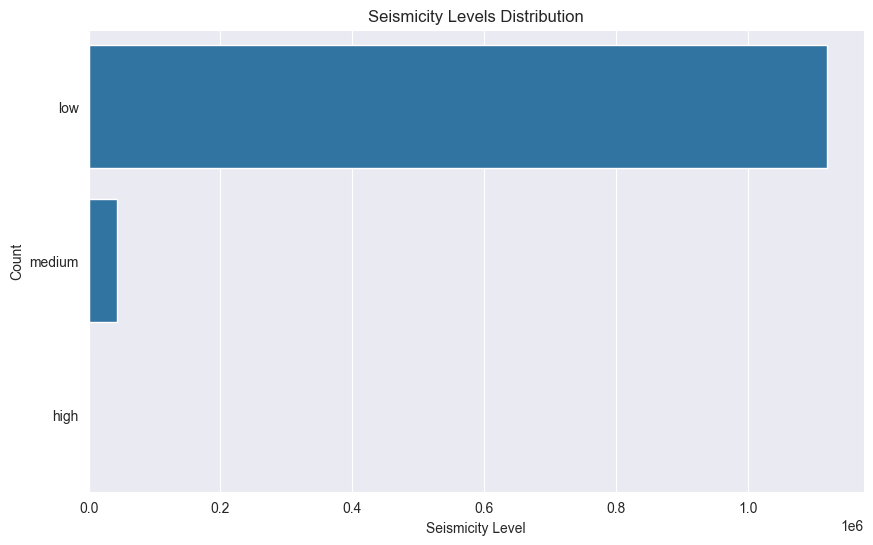

In [11]:
# 4. Seismicity Levels Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data['seismicity'])
plt.title('Seismicity Levels Distribution')
plt.xlabel('Seismicity Level')
plt.ylabel('Count')
plt.show()


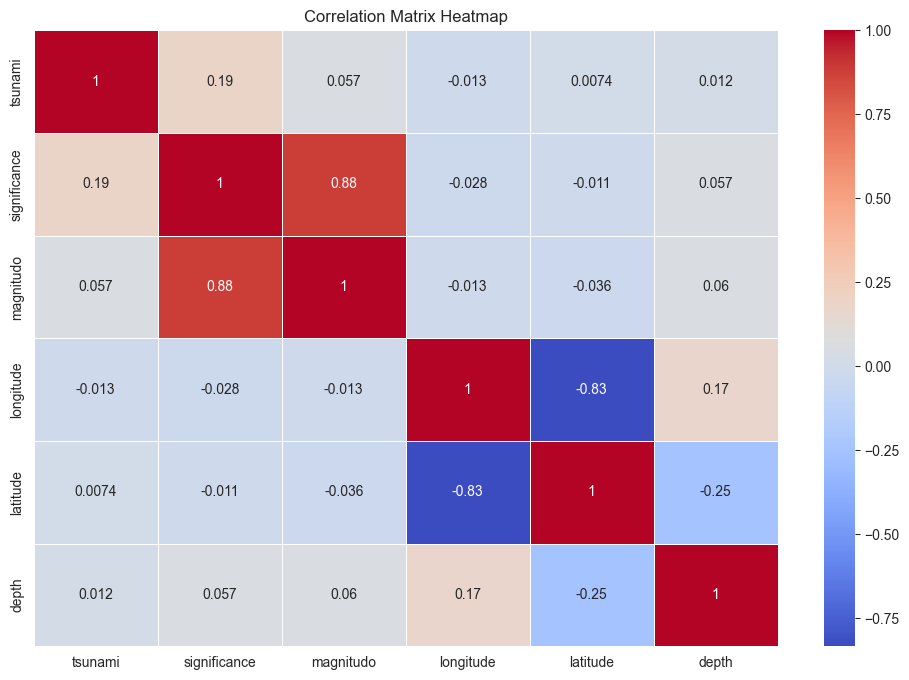

In [12]:
# 5. Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[['tsunami', 'significance', 'magnitudo', 'longitude', 'latitude', 'depth']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
# Separate features and target variable
X = data.drop(['significance'], axis=1)
y = data['significance']

# Encode the target variable
y = y.astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# SVM Classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [14]:
# Evaluate the models
print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

print("\nSVM Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Naive Bayes Classifier:
Accuracy: 0.9624868273974136
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    783443
           1       0.95      0.87      0.91    212908
           2       0.84      0.86      0.85      3831

    accuracy                           0.96   1000182
   macro avg       0.92      0.91      0.91   1000182
weighted avg       0.96      0.96      0.96   1000182


SVM Classifier:
Accuracy: 0.9994710962604806
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    783443
           1       1.00      1.00      1.00    212908
           2       1.00      1.00      1.00      3831

    accuracy                           1.00   1000182
   macro avg       1.00      1.00      1.00   1000182
weighted avg       1.00      1.00      1.00   1000182


Random Forest Classifier:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00

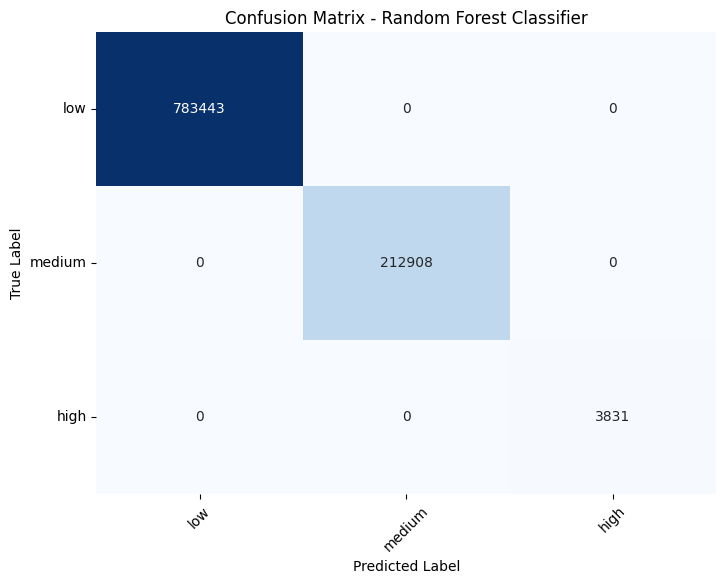

In [18]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Random Forest Classifier
rf_cm = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(rf_cm, labels, 'Random Forest Classifier')

In [60]:
import shap